In [56]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
import pandas as pd

def make_easy_blobs(
    n_per_class=50,
    mean_neg=(-3, -2),
    mean_pos=(3, 2),
    scale=0.8,
    seed=None
):
    rng = np.random.default_rng(seed)

    # Negative class samples around mean_neg
    X_neg = rng.normal(loc=mean_neg, scale=scale, size=(n_per_class, 2))
    Y_neg = -1 * np.ones((n_per_class, 1))

    # Positive class samples around mean_pos
    X_pos = rng.normal(loc=mean_pos, scale=scale, size=(n_per_class, 2))
    Y_pos =  1 * np.ones((n_per_class, 1))

    # Combine features and labels
    X = np.vstack([X_neg, X_pos]).astype(float)
    Y = np.vstack([Y_neg, Y_pos]).astype(float)

    return X, Y


In [57]:
X, Y = make_easy_blobs(n_per_class=50, seed=0)          # 100 train samples
X_test, Y_test = make_easy_blobs(n_per_class=50, seed=1) # 100 test samples

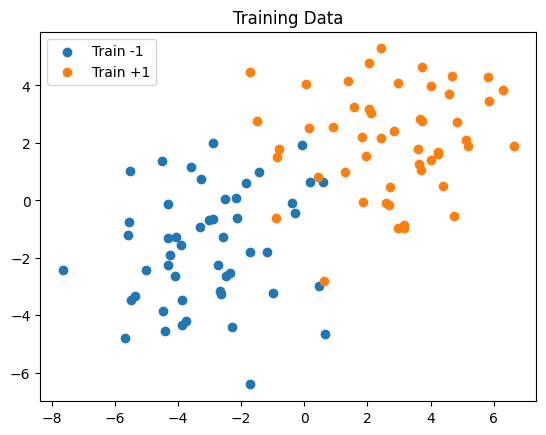

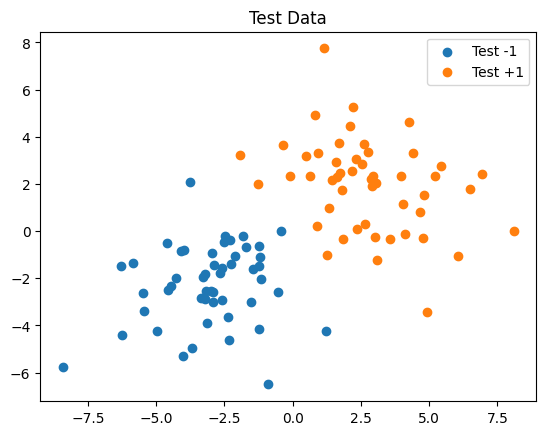

In [58]:
plt.figure()
plt.scatter(X[Y[:,0]==-1, 0], X[Y[:,0]==-1, 1], label='Train -1')
plt.scatter(X[Y[:,0]==1, 0], X[Y[:,0]==1, 1], label='Train +1')
plt.title("Training Data")
plt.legend()
plt.show()

# plot test data
plt.figure()
plt.scatter(X_test[Y_test[:,0]==-1, 0], X_test[Y_test[:,0]==-1, 1], label='Test -1')
plt.scatter(X_test[Y_test[:,0]==1, 0], X_test[Y_test[:,0]==1, 1], label='Test +1')
plt.title("Test Data")
plt.legend()
plt.show()

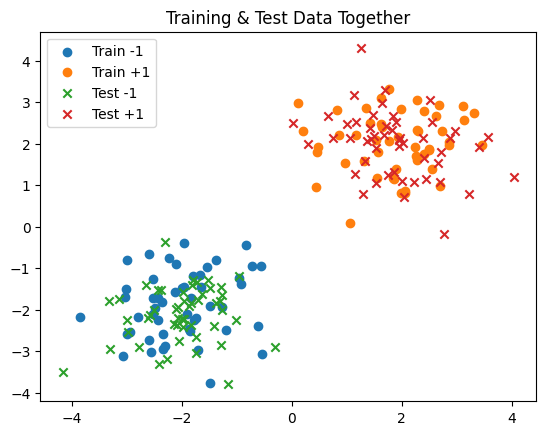

In [38]:
plt.figure()
# train points
plt.scatter(X[Y[:,0]==-1, 0], X[Y[:,0]==-1, 1], label='Train -1', marker='o')
plt.scatter(X[Y[:,0]==1, 0],  X[Y[:,0]==1, 1],  label='Train +1', marker='o')

# test points (different marker)
plt.scatter(X_test[Y_test[:,0]==-1, 0], X_test[Y_test[:,0]==-1, 1], label='Test -1', marker='x')
plt.scatter(X_test[Y_test[:,0]==1, 0],  X_test[Y_test[:,0]==1, 1],  label='Test +1', marker='x')

plt.title("Training & Test Data Together")
plt.legend()
plt.show()

In [39]:
def build_svm_problem(X, Y):

    m, n = X.shape
    beta = cp.Variable((n, 1))  # w
    b    = cp.Variable()        # bias

    hinge = cp.multiply(Y, X @ beta + b)
    loss   = cp.sum(cp.pos(1 - hinge))

    reg = 0.5 * cp.sum_squares(beta)
    lambd = cp.Parameter(nonneg=True, value=0.1)
    prob  = cp.Problem(cp.Minimize(loss*lambd + reg))
    return beta, b, lambd, prob

In [40]:
def error_rate(X, Y, w, b):
    y_pred = np.sign(X @ w + b)
    return float(np.mean(y_pred != Y))

In [41]:
prob.solve()

np.float64(0.5904568122142523)

In [42]:
beta.value

array([[0.89206057],
       [0.62052289]])

In [43]:
b.value

array(0.01152393)

In [44]:
train_error = error_rate(X, Y, beta.value, b.value)
test_error  = error_rate(X_test, Y_test, beta.value, b.value)

In [45]:
print(train_error)

0.0


In [46]:
print(test_error)

0.0
